[层次聚类](https://zhuanlan.zhihu.com/p/363879425)
- 方式：
  - 过不断的合并或者分割内置聚类来构建最终聚类。 
  - 聚类的层次可以被表示成树（或者树形图(dendrogram)）。
  - 树根是拥有所有样本的唯一聚类，叶子是仅有一个样本的聚类。
- 优点：
  - 距离和规则的相似度容易定义，限制少
  - 不需要预先制定聚类数
  - 可以发现类的层次关系
  - 对大样本数据效果较好
- 缺点：
  - 计算复杂度太高
  - 奇异值也能产生很大影响
  - 算法很可能聚类成链状

##### 两种主要类型：凝聚型（agglomerative）和分裂型（divisive）。

- 凝聚聚类：它也被称为AGNES（凝聚嵌套）
  - 它以自下而上的方式工作
  - 每个对象最初被认为是单元素簇（叶子）
  - 在算法的每个步骤中，将最相似的两个群集组合成新的更大的群集（节点）
  - 迭代此过程，直到所有点都只是一个单个大簇（root）的成员。 结果是一棵树，可以绘制为树状图。

- 分裂层次聚类：它也被称为DIANA（Divise Analysis）
  - 它以自上而下的方式工作。 
  - 该算法是AGNES的逆序。 
  - 它以root开头，其中所有对象都包含在单个集群中。 
  - 在迭代的每个步骤中，最异构的集群被分成两个。
  -  迭代该过程，直到所有对象都在它们自己的集群中

- 其中，凝聚聚类擅长识别小聚类。 分裂层次聚类擅长识别大型集群。

##### 如何衡量两组观测之间的差异？ 已经开发了许多不同的聚类聚集方法（即连接方法）来回答这个问题。 最常见的类型方法是：

- 最大或完全链接聚类(Maximum or complete linkage clustering)：它计算聚类1中元素和聚类2中元素之间的所有成对不相似性，并将这些不相似性的最大值（即最大值）视为两个聚类之间的距离。 它倾向于产生更紧凑的簇。
- 最小或单链接聚类(Minimum or single linkage clustering)：它计算聚类1中的元素和聚类2中的元素之间的所有成对不相似性，并将这些不相似性中的最小值视为链接标准。 它倾向于产生长而“松散”的簇。
- 平均或平均链接聚类(Mean or average linkage clustering)：它计算聚类1中的元素与聚类2中的元素之间的所有成对不相似性，并将这些不相似性的平均值视为两个聚类之间的距离。
- 质心连锁聚类(Centroid linkage clustering)：它计算聚类1的质心（长度为p变量的平均向量）与聚类2的质心之间的不相似性。
- Ward的最小方差方法(Ward’s minimum variance method)：它最小化了整个群内方差。 在每个步骤中，合并具有最小簇间距离的一对簇。

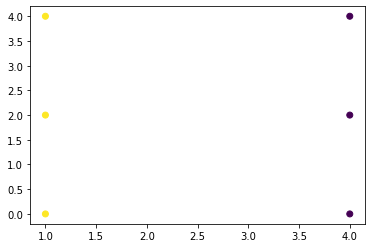

In [7]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
plt.scatter(X[:,0],X[:,1],c=clustering.labels_,cmap='viridis')


### 问题描述：
- 为了同时考虑坐标点之间的地理距离和发电量，定义一个适当的度量指标
- custom_metric函数通过haversine formula计算地球表面两点之间的距离
- 并将产生的功率差的绝对值乘以一个加权因子。权重的大小决定了聚类过程中距离和功率差的相对影响
- 可以用kmeans或者其他的方法吗？SciPy的kmeans和scikit-learn的KMeans的当前实现仅支持欧几里德距离
- 另一种方法是通过SciPy的聚类包执行hierarchical clustering,根据刚定义的度量对中心进行分组

轮廓系数：0.095093


{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [13.75, 13.75, 60.0, 60.0]],
 'dcoord': [[0.0, 2440.717249870658, 2440.717249870658, 0.0],
  [0.0, 6746.503898733548, 6746.503898733548, 2440.717249870658],
  [0.0, 11509.177902757956, 11509.177902757956, 6746.503898733548],
  [0.0, 2900.265194175589, 2900.265194175589, 0.0],
  [0.0, 6582.909557549055, 6582.909557549055, 0.0],
  [2900.265194175589,
   13695.071805004523,
   13695.071805004523,
   6582.909557549055],
  [11509.177902757956,
   18339.82236232635,
   18339.82236232635,
   13695.071805004523]],
 'ivl': ['6', '2', '0', '5', '3', '4', '1', '7'],
 'leaves': [6, 2, 0, 5, 3, 4, 1, 7],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C3', 'C0', 'C0']}

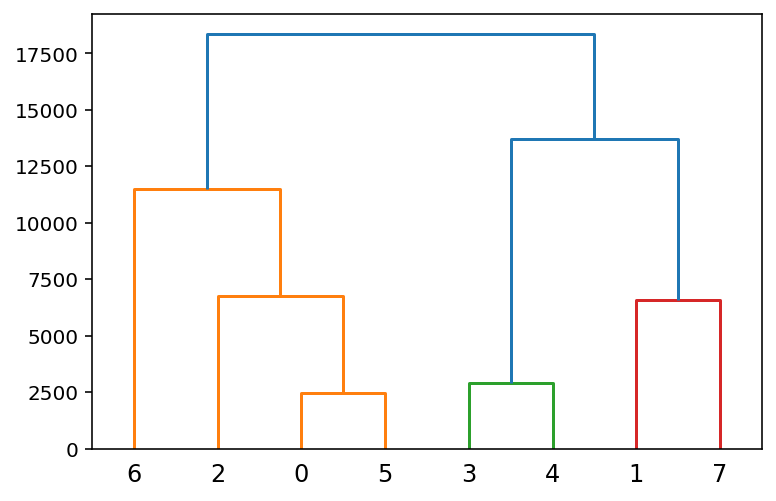

In [25]:
from scipy.cluster.hierarchy import linkage, cut_tree
from scipy.cluster.hierarchy import dendrogram
import numpy as np

N = 8  # 样本量
np.random.seed(0)

lat = np.random.uniform(low=-90, high=90, size=N)
lng = np.random.uniform(low=-180, high=180, size=N)
power = np.random.randint(low=5, high=50, size=N)
data = np.vstack([lat, lng, power]).T

def custom_metric(central_1, central_2, weight=1):
    lat1, lng1, pow1 = central_1
    lat2, lng2, pow2 = central_2
    lat1, lat2, lng1, lng2 = np.deg2rad(np.asarray([lat1, lat2, lng1, lng2]))
    dlat = lat2 - lat1
    dlng = lng2 - lng1
    h = (1 - np.cos(dlat))/2. + np.cos(lat1)*np.cos(lat2)*(1 - np.cos(dlng))/2.
    km = 2*6371*np.arcsin(np.sqrt(h))
    MW = np.abs(pow2 - pow1)
    return km + weight*MW

# 要将这些数据分成三个不同的组,我们必须将数据和custom_metric传递给链接函数,然后将返回的链接矩阵传递给cut_tree函数,其中n_clusters = 3.
Z = linkage(data, method='complete', metric=custom_metric)
y = cut_tree(Z, 3).flatten() # y即data对应cluster  :array([0, 1, 0, 2, 2, 0, 0, 1])

print('轮廓系数：%.6f'% metrics.silhouette_score(data,y))
# 修改权重度量，调度lambda表达式。metric = lambda x,y：custom_metric(x,y,250)

# 最后,为了更深入地了解分层/凝聚聚类,可以将其绘制为树状图
dendrogram(Z)

[密度聚类DBSACN](https://zhuanlan.zhihu.com/p/77043965?utm_source=qq)
[2](https://zhuanlan.zhihu.com/p/336501183)
- 优点；
  - 不需要输入类别数k
  - 可以发现任意形状的聚类簇
  - 可以在聚类的同时发现异常点，对数据集中的异常点不敏感
  - 在稠密数据集上效果较好
  - 聚类结果没有偏倚，相对的，K-Means之类的聚类算法初始值对聚类结果有很大影响
- 缺点：
  - 如果样本集的密度不均匀、聚类间距差相差很大时，聚类质量较差，这时用DBSCAN聚类一般不适合。
  - 如果样本集较大时，聚类收敛时间较长，此时可以对搜索最近邻时建立的KD树或者球树进行规模限制来改进。
  - 调参相对于传统的K-Means之类的聚类算法稍复杂，主要需要对距离阈值ϵ，邻域样本数阈值MinPts联合调参，不同的参数组合对最后的聚类效果有较大影响。

- 调参建议：
  - The DBSCAN paper suggests to choose minPts based on the dimensionality, and eps based on the elbow in the k-distance graph.

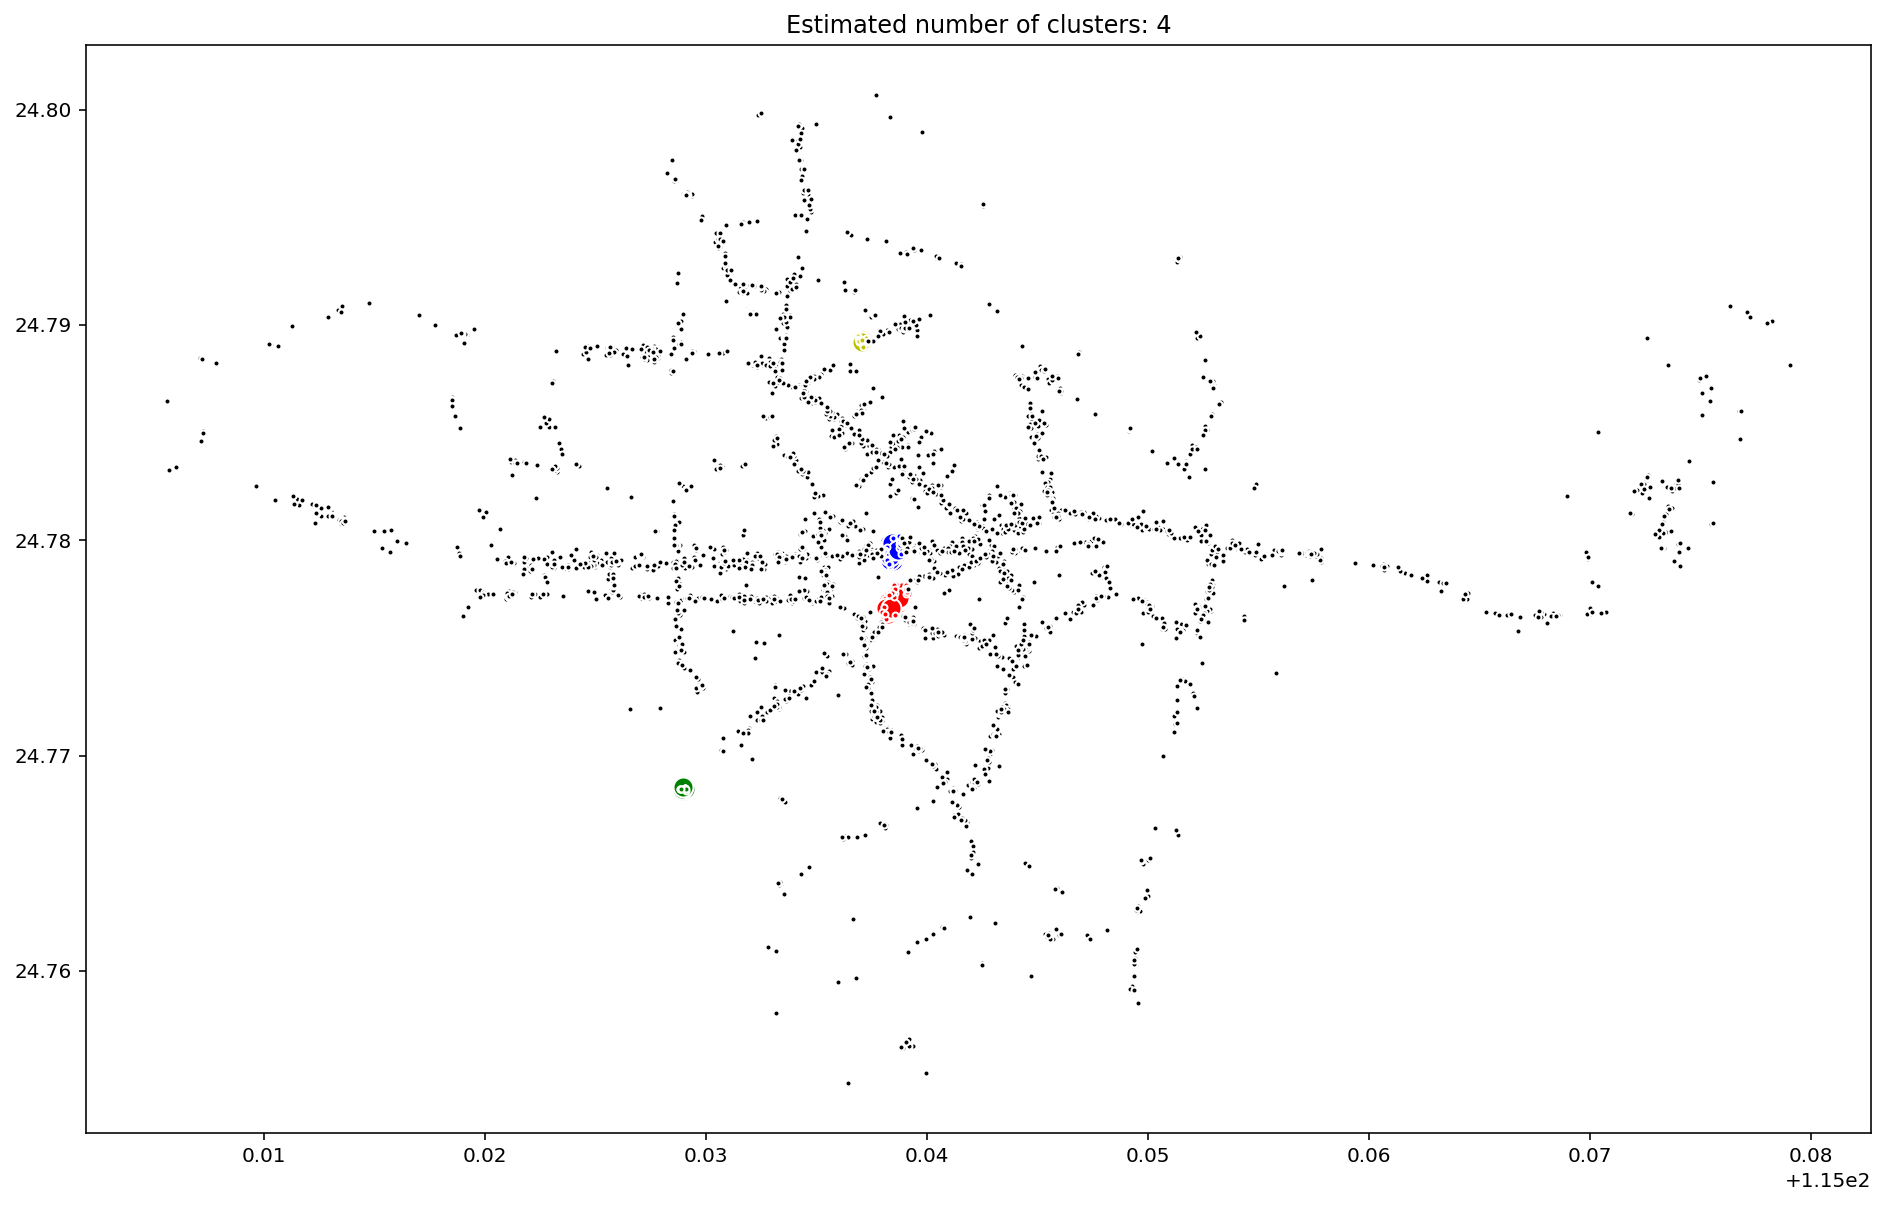

In [12]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from math import radians, sin, cos, asin, sqrt

%config InlineBackend.figure_format = 'retina'  # retina高清图  svg高清矢量图
%matplotlib inline

def haversine(latlon1, latlon2):
    """
    计算两经纬度之间的距离
    """
    if (latlon1 - latlon2).all():
        lat1, lon1 = latlon1
        lat2, lon2 = latlon2
        lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
        c = 2 * asin(sqrt(a))
        r = 6370996.81  # 地球半径
        distance = c * r
    else:
        distance = 0
    return distance


if __name__ == "__main__":

    df = pd.read_csv('data/161_order.csv')
    data = list(zip(df.lon,df.lat))
    data = np.array(data)
    MinPts = int(data.shape[0] / 100)
    eps = 25

    db = DBSCAN(eps=eps, min_samples=MinPts, metric=haversine).fit(data) # 自定义metric不支持 参数algorithm='kd_tree'
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    unique_labels = set(labels)
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'orange']
    plt.figure(figsize=(16,10))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = 'k'
        class_member_mask = (labels == k)
        xy = data[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='w', markersize=10)

        xy = data[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='w', markersize=3)

    plt.title('Estimated number of clusters: %d' % n_clusters_)
    plt.show()

In [17]:

raito = sum([1 for i in labels if i==-1])/len(labels) #labels=-1的个数除以总数，计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 获取分簇的数目
print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(data, labels)) #轮廓系数评价聚类的好坏,此系数评价聚类的好坏，值越大越好，值越大，图中的点就越大。


噪声比: 91.21%
分簇的数目: 4
轮廓系数: -0.380


#### demo

噪声比: 28.33%
分簇的数目: 4
轮廓系数: 0.332


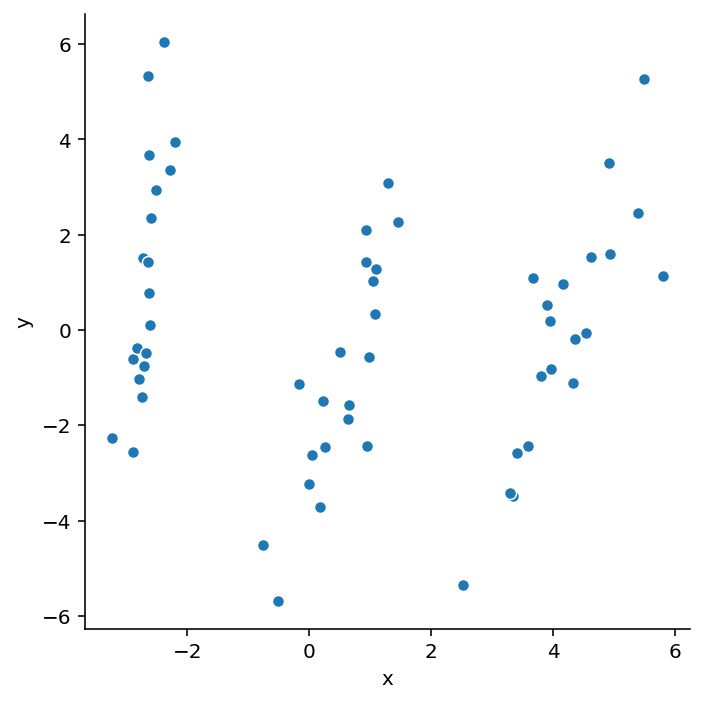

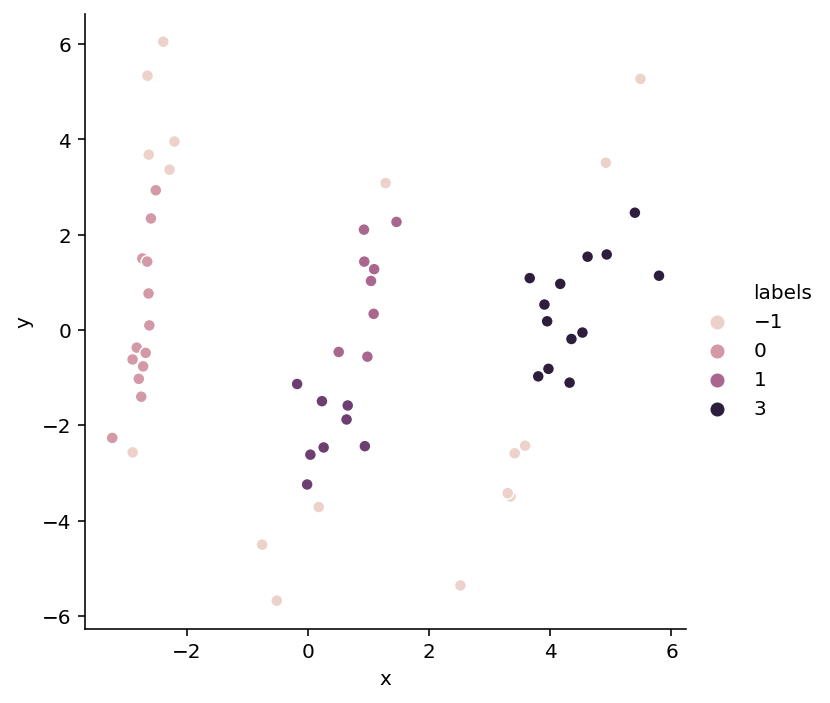

In [27]:

data=[
 [-2.68420713,1.469732895],[-2.71539062,-0.763005825],[-2.88981954,-0.618055245],[-2.7464372,-1.40005944],[-2.72859298,1.50266052],
 [-2.27989736,3.365022195],[-2.82089068,-0.369470295],[-2.62648199,0.766824075],[-2.88795857,-2.568591135],[-2.67384469,-0.48011265],
 [-2.50652679,2.933707545],[-2.61314272,0.096842835],[-2.78743398,-1.024830855],[-3.22520045,-2.264759595],[-2.64354322,5.33787705],
 [-2.38386932,6.05139453],[-2.6225262,3.681403515],[-2.64832273,1.436115015],[-2.19907796,3.956598405],[-2.58734619,2.34213138],
 [1.28479459,3.084476355],[0.93241075,1.436391405],[1.46406132,2.268854235],[0.18096721,-3.71521773],[1.08713449,0.339256755],
 [0.64043675,-1.87795566],[1.09522371,1.277510445],[-0.75146714,-4.504983795],[1.04329778,1.030306095],[-0.01019007,-3.242586915],
 [-0.5110862,-5.681213775],[0.51109806,-0.460278495],[0.26233576,-2.46551985],[0.98404455,-0.55962189],[-0.174864,-1.133170065],
 [0.92757294,2.107062945],[0.65959279,-1.583893305],[0.23454059,-1.493648235],[0.94236171,-2.43820017],[0.0432464,-2.616702525],
 [4.53172698,-0.05329008],[3.41407223,-2.58716277],[4.61648461,1.538708805],[3.97081495,-0.815065605],[4.34975798,-0.188471475],
 [5.39687992,2.462256225],[2.51938325,-5.361082605],[4.9320051,1.585696545],[4.31967279,-1.104966765],[4.91813423,3.511712835],
 [3.66193495,1.0891728],[3.80234045,-0.972695745],[4.16537886,0.96876126],[3.34459422,-3.493869435],[3.5852673,-2.426881725],
 [3.90474358,0.534685455],[3.94924878,0.18328617],[5.48876538,5.27195043],[5.79468686,1.139695065],[3.29832982,-3.42456273]
]
data = pd.DataFrame(data)
data.columns=['x','y']
sns.relplot(x="x",y="y",data=data)


db = DBSCAN(eps=1, min_samples=5).fit(data) #DBSCAN聚类方法 还有参数，matric = ""距离计算方法
data['labels'] = db.labels_ #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声，我们把标签放回到data数据集中方便画图
labels = db.labels_
raito = data.loc[data['labels']==-1].x.count()/data.x.count() #labels=-1的个数除以总数，计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 获取分簇的数目
print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(data, labels)) #轮廓系数评价聚类的好坏
sns.relplot(x="x",y="y", hue="labels",data=data)

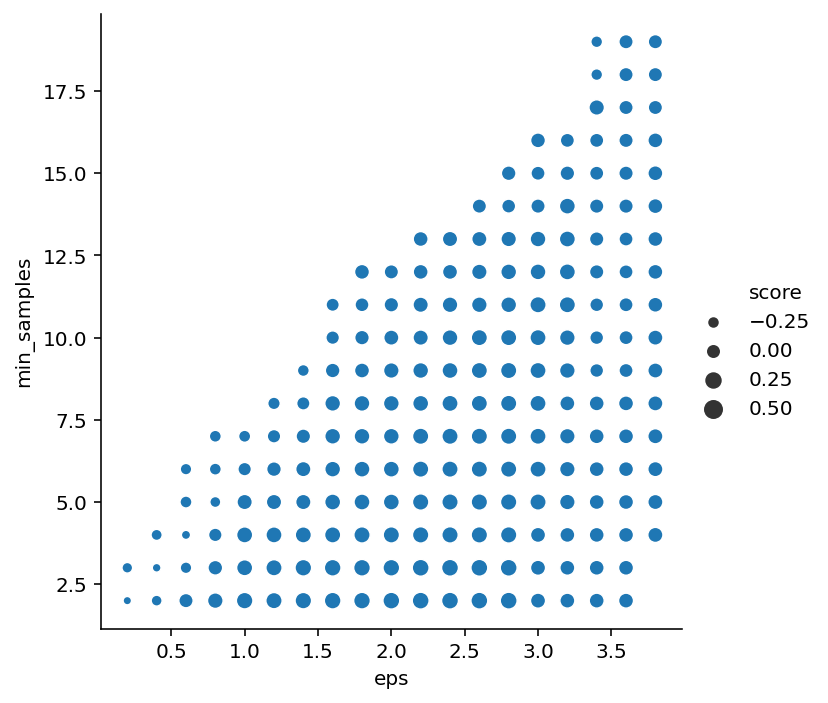

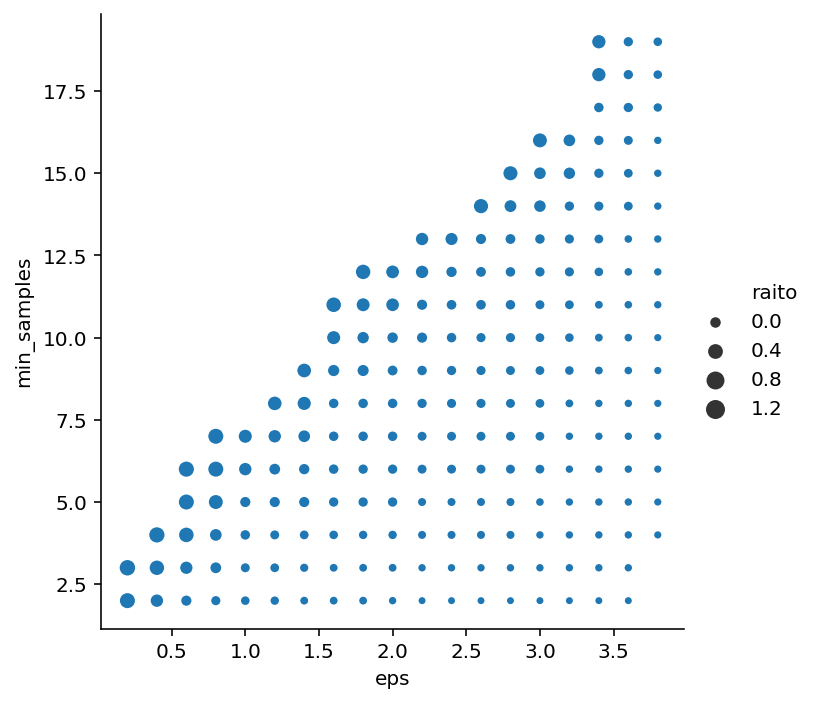

In [20]:
rs= []#存放各个参数的组合计算出来的模型评估得分和噪声比
eps = np.arange(0.2,4,0.2) #eps参数从0.2开始到4，每隔0.2进行一次
min_samples=np.arange(2,20,1)#min_samples参数从2开始到20

best_score=0
best_score_eps=0
best_score_min_samples=0

for i in eps:
    for j in min_samples:
        try:#因为不同的参数组合，有可能导致计算得分出错，所以用try
            db = DBSCAN(eps=i, min_samples=j).fit(data)
            labels= db.labels_#得到DBSCAN预测的分类便签
            k=metrics.silhouette_score(data,labels) #轮廓系数评价聚类的好坏，值越大越好
            raito = len(labels[labels[:] == -1]) / len(labels) #计算噪声点个数占总数的比例
            n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 获取分簇的数目
            rs.append([i,j,k,raito,n_clusters_])
            if k>best_score:
                best_score=k
                best_score_eps=i
                best_score_min_samples=j

        except:
            db='' #这里用try就是遍历i，j 计算轮廓系数会出错的，出错的就跳过
        else:
            db=''
rs= pd.DataFrame(rs)
rs.columns=['eps','min_samples','score','raito','n_clusters']
sns.relplot(x="eps",y="min_samples", size='score',data=rs)
sns.relplot(x="eps",y="min_samples", size='raito',data=rs)

通过上图可以看出来，同时参考得分越大越好，噪声比越小越好，eps取值在1-2.5之间，min_samples取值在3-15之间，并且min_samples的影响不大。有很多的参数组合的结果的差不多，我们在合适的组合中随便选择一组。
修改参数eps=1.3 min_samples=3

噪声比: 6.67%
分簇的数目: 5
轮廓系数: 0.410


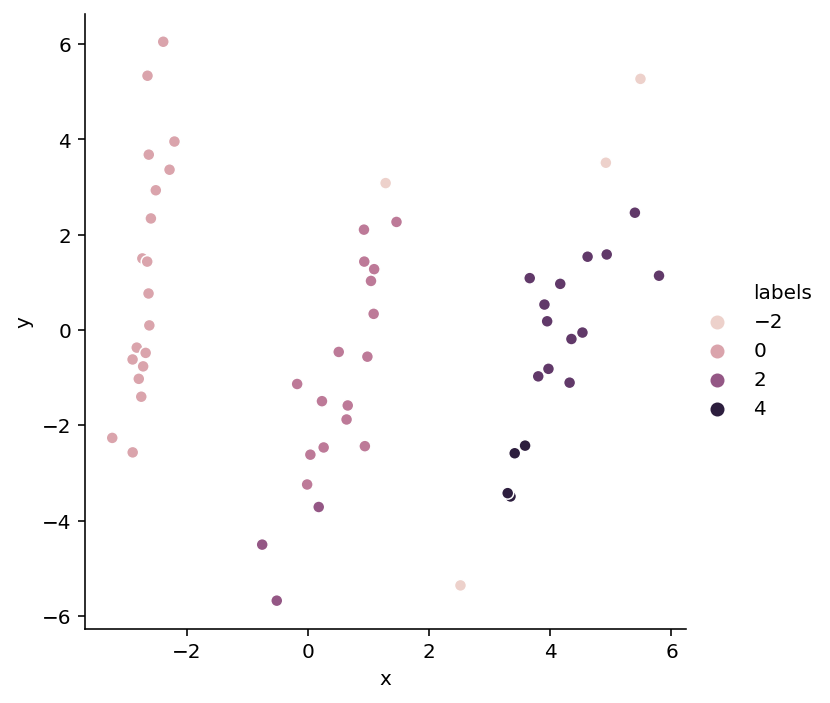

In [28]:
db = DBSCAN(eps=1.5, min_samples=3).fit(data) #DBSCAN聚类方法 还有参数，matric = ""距离计算方法
data['labels'] = db.labels_ #和X同一个维度，labels对应索引序号的值 为她所在簇的序号。若簇编号为-1，表示为噪声，我们把标签放回到data数据集中方便画图
labels = db.labels_
raito = data.loc[data['labels']==-1].x.count()/data.x.count() #labels=-1的个数除以总数，计算噪声点个数占总数的比例
print('噪声比:', format(raito, '.2%'))
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) # 获取分簇的数目
print('分簇的数目: %d' % n_clusters_)
print("轮廓系数: %0.3f" % metrics.silhouette_score(data, labels)) #轮廓系数评价聚类的好坏
sns.relplot(x="x",y="y", hue="labels",data=data)